In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("SalaryData_Train (1).csv")

In [3]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_train.shape

(30161, 14)

In [5]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
data_train.describe(include='object')

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22285,9840,14065,4038,12463,25932,20380,27504,22653


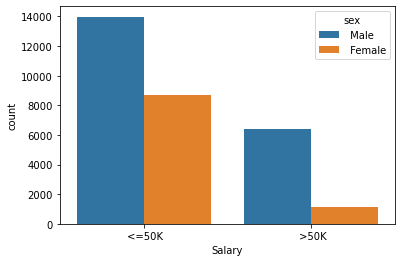

In [8]:
sns.countplot(x=data_train['Salary'],hue=data_train['sex'])
plt.show()

In [9]:
le =LabelEncoder()
data_train['Salary'] = le.fit_transform(data_train['Salary'])

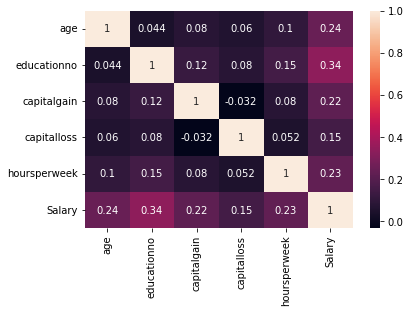

In [10]:
sns.heatmap(data_train.corr(),annot=True)
plt.show()

In [11]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
data_train.drop('educationno',axis=1,inplace=True)
data_train.drop('race',axis=1,inplace=True)
data_train.drop('relationship',axis=1,inplace=True)

In [13]:
data_train['workclass'] = le.fit_transform(data_train['workclass'])
data_train['education'] =le.fit_transform(data_train['education'])
data_train['maritalstatus'] = le.fit_transform(data_train['maritalstatus'])
data_train['occupation'] = le.fit_transform(data_train['occupation'])
data_train['native'] = le.fit_transform(data_train['native'])
data_train['sex'] = le.fit_transform(data_train['sex'])

In [14]:
data_train.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,2174,0,40,37,0
1,50,4,9,2,3,1,0,0,13,37,0
2,38,2,11,0,5,1,0,0,40,37,0
3,53,2,1,2,5,1,0,0,40,37,0
4,28,2,9,2,9,0,0,0,40,4,0


In [15]:
x = data_train.drop('Salary',axis=1)
y = data_train[['Salary']]

In [16]:
std = StandardScaler()
x_scaled = std.fit_transform(x)

In [17]:
gnb = GaussianNB()
gnb.fit(x_scaled,y)

GaussianNB()

In [18]:
y_pred_train = gnb.predict(x)

In [19]:
accuracy_score(y,y_pred_train)

0.774278041179006

In [20]:
confusion_matrix(y_pred_train,y)

array([[21021,  5176],
       [ 1632,  2332]], dtype=int64)

In [21]:
print(classification_report(y,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22653
           1       0.59      0.31      0.41      7508

    accuracy                           0.77     30161
   macro avg       0.70      0.62      0.63     30161
weighted avg       0.75      0.77      0.75     30161



In [22]:
data_test =pd.read_csv("SalaryData_Test (1).csv")

In [23]:
data_test.shape

(15060, 14)

In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [25]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [26]:
data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [27]:
data_test.describe(include='object')

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,15060,15060,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,11021,4943,6990,1992,6203,12970,10147,13788,11360


In [28]:
data_test.drop('educationno',axis=1,inplace=True)
data_test.drop('race',axis=1,inplace=True)
data_test.drop('relationship',axis=1,inplace=True)

In [29]:
data_test['workclass'] = le.fit_transform(data_test['workclass'])
data_test['maritalstatus'] = le.fit_transform(data_test['maritalstatus'])
data_test['education'] = le.fit_transform(data_test['education'])
data_test['occupation'] = le.fit_transform(data_test['occupation'])
data_test['sex'] = le.fit_transform(data_test['sex'])
data_test['native'] = le.fit_transform(data_test['native'])
data_test['Salary']= le.fit_transform(data_test['Salary'])


In [30]:
data_test.head()

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,1,0,0,40,37,0
1,38,2,11,2,4,1,0,0,50,37,0
2,28,1,7,2,10,1,0,0,40,37,1
3,44,2,15,2,6,1,7688,0,40,37,1
4,34,2,0,4,7,1,0,0,30,37,0


In [31]:
x_test = data_test.drop('Salary',axis=1)
y_test = data_test[['Salary']]

In [32]:
X_scaled = std.fit_transform(x_test)

In [33]:
gnb.fit(X_scaled,y_test)

GaussianNB()

In [34]:
y_pred_test = gnb.predict(X_scaled)

In [35]:
accuracy_score(y_test,y_pred_test)

0.7923638778220452

In [36]:
confusion_matrix(y_test,y_pred_test)

array([[10796,   564],
       [ 2563,  1137]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060

